### Support Vector Machine

SVM or Support Vector Machine is a linear model for classification and regression problems. It can solve linear and non-linear problems and work well for many practical problems. The idea of SVM is simple: The algorithm creates a line or a hyperplane which separates the data into classes.

At first approximation what SVMs do is to find a separating line (or hyperplane) between data of two classes. SVM is an algorithm that takes the data as an input and outputs a line that separates those classes if possible.

Lets begin with a problem. Suppose you have a dataset as shown below and you need to classify the red rectangles from the blue ellipses(let’s say positives from the negatives). So your task is to find an ideal line that separates this dataset in two classes (say red and blue).

<img src='images/svm1.png' alt='svm1' style="width: 500px;"/>

But, as you notice there isn’t a unique line that does the job. In fact, we have an infinite lines that can separate these two classes. So how does SVM find the ideal one???

Let’s take some probable candidates and figure it out ourselves.

<img src='images/svm2.png' alt='svm2' style="width: 500px;"/>

We have two candidates here, the green colored line and the yellow colored line. Which line according to you best separates the data?

If you selected the yellow line then congrats, because thats the line we are looking for. It’s visually quite intuitive in this case that the yellow line classifies better. But, we need something concrete to fix our line.

The green line in the image above is quite close to the red class. Though it classifies the current datasets it is not a generalized line and in machine learning our goal is to get a more generalized separator.

#### How does SVM fit the decision boundary?

According to the SVM algorithm we find the points closest to the line from both the classes.These points are called support vectors. Now, we compute the distance between the line and the support vectors. This distance is called the margin. Our goal is to maximize the margin. The hyperplane for which the margin is maximum is the optimal hyperplane.

<img src='images/svm3.png' alt='svm3' style="width: 500px;"/>

Thus SVM tries to make a decision boundary in such a way that the separation between the two classes(that street) is as wide as possible.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from subprocess import check_output
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/data.csv')
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

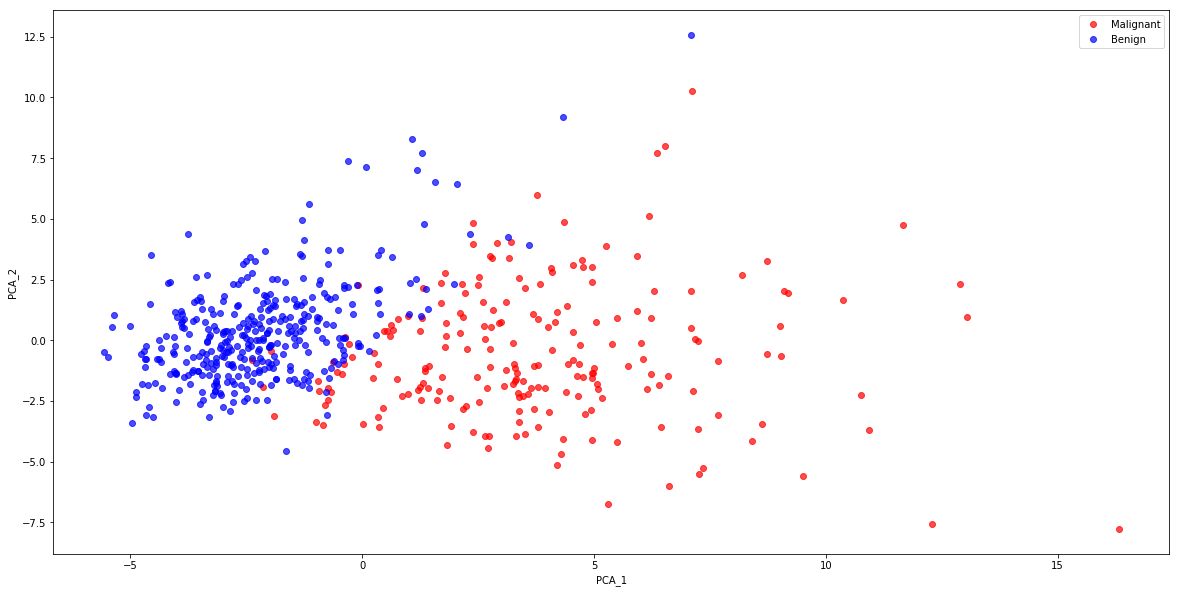

In [4]:
plt.figure(figsize=(20,10))

df_std = StandardScaler().fit_transform(df.drop(['id','diagnosis','Unnamed: 32'], axis = 1))
pca = PCA(n_components=2)
pca.fit(df_std)
TwoD_Data = pca.transform(df_std)
PCA_df = pd.DataFrame()
PCA_df['PCA_1'] = TwoD_Data[:,0]
PCA_df['PCA_2'] = TwoD_Data[:,1]


plt.plot(PCA_df['PCA_1'][df.diagnosis == 'M'],PCA_df['PCA_2'][df.diagnosis == 'M'],'o', alpha = 0.7, color = 'r')
plt.plot(PCA_df['PCA_1'][df.diagnosis == 'B'],PCA_df['PCA_2'][df.diagnosis == 'B'],'o', alpha = 0.7, color = 'b')
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.legend(['Malignant','Benign'])

In [5]:
PCA_df['target'] = 0
PCA_df['target'][df.diagnosis == 'M'] = 1

traindf, testdf = train_test_split(PCA_df, test_size = 0.3)

X = traindf[['PCA_1','PCA_2']]
y = traindf['target']

#### SVM with a linear kernel

Now let's train a linear Support Vector Classifier. a SVM classifier finds the hyper-plane that maximizes the margin between the 2 groups if they are linearly separable. If the data is not linearly separable, there is a trade-off between the margin size and the number of points that are on the wrong side of the decision boundary. this is determined by the regularization coefficient.

#### Tuning Parameters

Parameters are arguments that you pass when you create your classifier. Following are the important parameters for SVM.

#### C

It controls the trade off between smooth decision boundary and classifying training points correctly. A large value of c means you will get more training points correctly.

Consider an example as shown in the figure above. There are a number of decision boundaries that we can draw for this dataset. Consider a straight (green colored) decision boundary which is quite simple but it comes at the cost of a few points being misclassified. These misclassified points are called outliers. We can also make something that is considerably more wiggly but where we get potentially all of the training points correct. Of course the trade off having something that is very intricate, very complicated like this is that chances are it is not going to generalize quite as well to our test set. So something that is simple, more straight maybe actually the better choice if you look at the accuracy. Large value of c means you will get more intricate decision curves trying to fit in all the points. Figuring out how much you want to have a smooth decision boundary vs one that gets things correct is part of artistry of machine learning. So try different values of c for your dataset to get the perfectly balanced curve and avoid over fitting.

#### Gamma

It defines how far the influence of a single training example reaches. If it has a low value it means that every point has a far reach and conversely high value of gamma means that every point has close reach.

If gamma has a very high value, then the decision boundary is just going to be dependent upon the points that are very close to the line which effectively results in ignoring some of the points that are very far from the decision boundary. This is because the closer points get more weight and it results in a wiggly curve. On the other hand, if the gamma value is low even the far away points get considerable weight and we get a more linear curve.

training accuracy... 0.9547738693467337
validation accuracy... 0.9590643274853801
number of supporting points... [28 28]


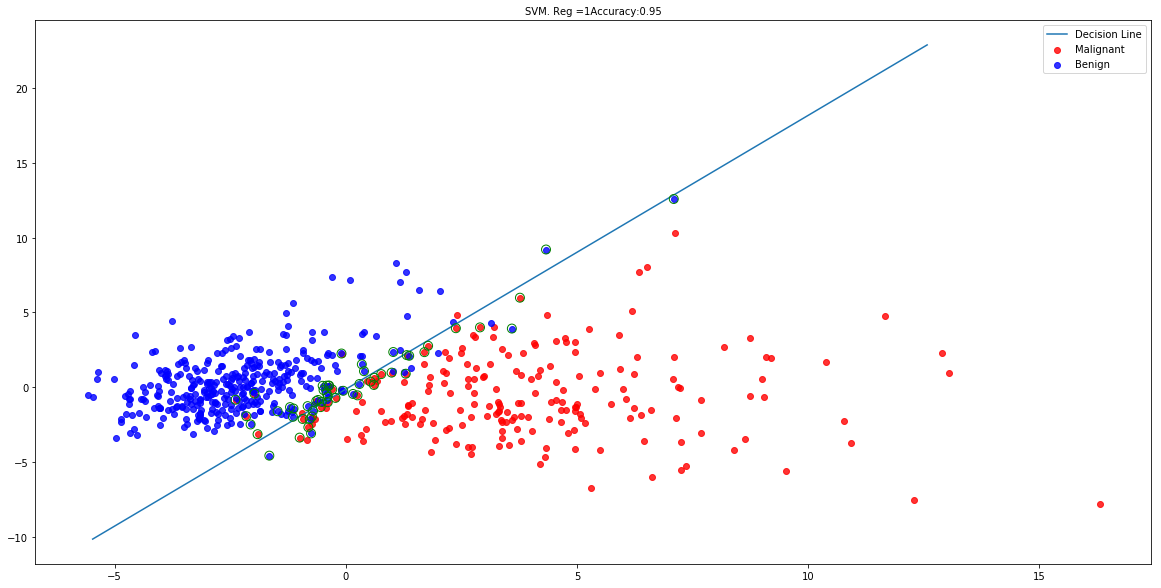

In [6]:
C = 1
clf2 = SVC(kernel = 'linear',C =C)
clf2.fit(X, y)
print('training accuracy...',clf2.score(X, y, sample_weight=None))
print('validation accuracy...',clf2.score(testdf[['PCA_1','PCA_2']],testdf['target']))

plt.figure(figsize=(20,10))

w = clf2.coef_[0]
a = -w[0] / w[1]
xx =  np.linspace(min(X.PCA_1), max(X.PCA_2), 100)
yy = a * xx - (clf2.intercept_[0]) / w[1]
plt.scatter(PCA_df.PCA_1[PCA_df.target == 1],PCA_df.PCA_2[PCA_df.target == 1], alpha = 0.8, color = 'r')
plt.scatter(PCA_df.PCA_1[PCA_df.target == 0],PCA_df.PCA_2[PCA_df.target == 0], alpha = 0.8, color = 'b')
plt.scatter(clf2.support_vectors_[:, 0], clf2.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, color = 'g')
plt.plot(xx, yy)
plt.title('SVM.' + ' Reg =' + str(C) + 'Accuracy:' + str(clf2.score(testdf[['PCA_1','PCA_2']],testdf['target']))[0:4], fontsize = 10)


mu_vec1 = np.array([0,0])
cov_mat1 = np.array([[2,0],[0,2]])
x1_samples = np.random.multivariate_normal(mu_vec1, cov_mat1, 100)
mu_vec1 = mu_vec1.reshape(1,2).T # to 1-col vector

mu_vec2 = np.array([1,2])
cov_mat2 = np.array([[1,0],[0,1]])
x2_samples = np.random.multivariate_normal(mu_vec2, cov_mat2, 100)
mu_vec2 = mu_vec2.reshape(1,2).T
print('number of supporting points...',clf2.n_support_ )

plt.legend(['Decision Line','Malignant','Benign'])

#### Let us change the regularization parameter

training accuracy... 0.9547738693467337
validation accuracy... 0.9590643274853801
[28 28]


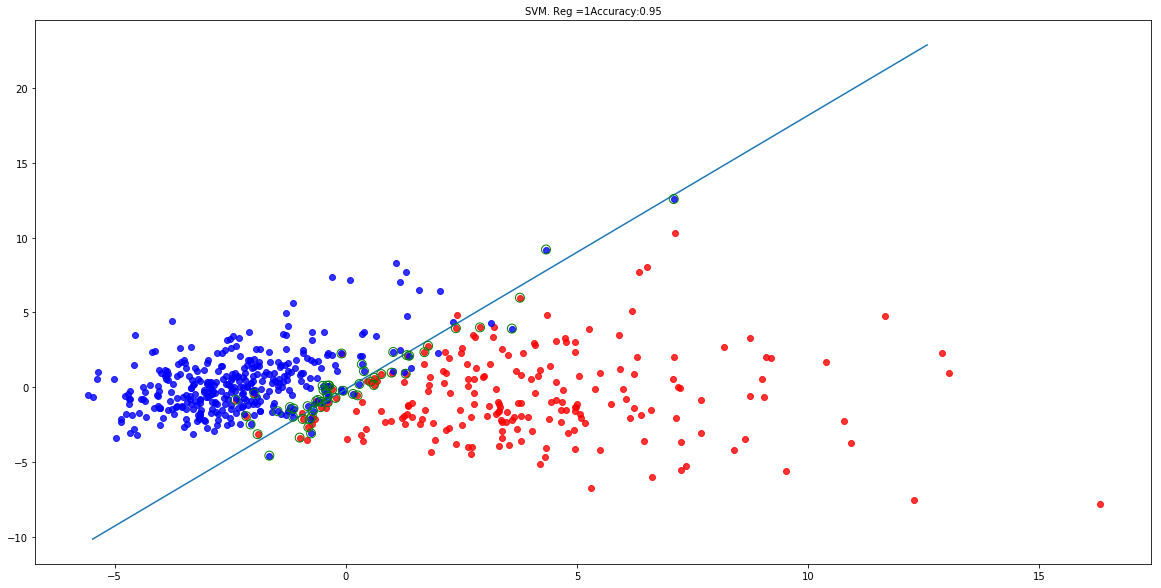

In [7]:
C = 1
clf2 = SVC(kernel = 'linear',C =C)
clf2.fit(X, y)
print('training accuracy...',clf2.score(X, y, sample_weight=None))
print('validation accuracy...',clf2.score(testdf[['PCA_1','PCA_2']],testdf['target']))

plt.figure(figsize=(20,10))

w = clf2.coef_[0]
a = -w[0] / w[1]
xx =  np.linspace(min(X.PCA_1), max(X.PCA_2), 100)
yy = a * xx - (clf2.intercept_[0]) / w[1]
plt.scatter(PCA_df.PCA_1[PCA_df.target == 1],PCA_df.PCA_2[PCA_df.target == 1], alpha = 0.8, color = 'r')
plt.scatter(PCA_df.PCA_1[PCA_df.target == 0],PCA_df.PCA_2[PCA_df.target == 0], alpha = 0.8, color = 'b')
plt.scatter(clf2.support_vectors_[:, 0], clf2.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, color = 'g')
plt.plot(xx, yy)
plt.title('SVM.' + ' Reg =' + str(C) + 'Accuracy:' + str(clf2.score(testdf[['PCA_1','PCA_2']],testdf['target']))[0:4], fontsize = 10)


mu_vec1 = np.array([0,0])
cov_mat1 = np.array([[2,0],[0,2]])
x1_samples = np.random.multivariate_normal(mu_vec1, cov_mat1, 100)
mu_vec1 = mu_vec1.reshape(1,2).T # to 1-col vector

mu_vec2 = np.array([1,2])
cov_mat2 = np.array([[1,0],[0,1]])
x2_samples = np.random.multivariate_normal(mu_vec2, cov_mat2, 100)
mu_vec2 = mu_vec2.reshape(1,2).T
print(clf2.n_support_ )

training accuracy... 0.957286432160804
validation accuracy... 0.9590643274853801
[27 27]


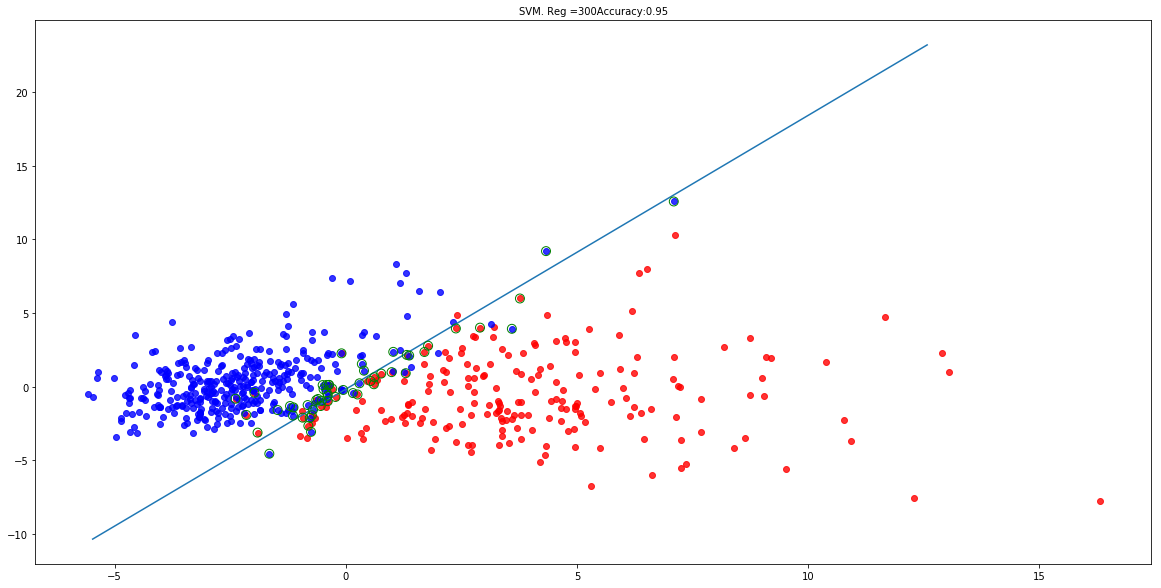

In [8]:
C = 300
clf2 = SVC(kernel = 'linear',C =C)
clf2.fit(X, y)
print('training accuracy...',clf2.score(X, y, sample_weight=None))
print('validation accuracy...',clf2.score(testdf[['PCA_1','PCA_2']],testdf['target']))

plt.figure(figsize=(20,10))

w = clf2.coef_[0]
a = -w[0] / w[1]
xx =  np.linspace(min(X.PCA_1), max(X.PCA_2), 100)
yy = a * xx - (clf2.intercept_[0]) / w[1]
plt.scatter(PCA_df.PCA_1[PCA_df.target == 1],PCA_df.PCA_2[PCA_df.target == 1], alpha = 0.8, color = 'r')
plt.scatter(PCA_df.PCA_1[PCA_df.target == 0],PCA_df.PCA_2[PCA_df.target == 0], alpha = 0.8, color = 'b')
plt.scatter(clf2.support_vectors_[:, 0], clf2.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, color = 'g')
plt.plot(xx, yy)
plt.title('SVM.' + ' Reg =' + str(C) + 'Accuracy:' + str(clf2.score(testdf[['PCA_1','PCA_2']],testdf['target']))[0:4], fontsize = 10)

mu_vec1 = np.array([0,0])
cov_mat1 = np.array([[2,0],[0,2]])
x1_samples = np.random.multivariate_normal(mu_vec1, cov_mat1, 100)
mu_vec1 = mu_vec1.reshape(1,2).T # to 1-col vector

mu_vec2 = np.array([1,2])
cov_mat2 = np.array([[1,0],[0,1]])
x2_samples = np.random.multivariate_normal(mu_vec2, cov_mat2, 100)
mu_vec2 = mu_vec2.reshape(1,2).T
print(clf2.n_support_ )

#### SVM with Non Linear Kernels

In [9]:
clf3 = SVC(kernel = 'poly',degree = 3)
clf3.fit(X, y)
print('Polynomial kernel - training accuracy...',clf3.score(X, y, sample_weight=None))
print('Polynomial kernel - validation accuracy...',clf3.score(testdf[['PCA_1','PCA_2']],testdf['target']))
print('Polynomial kernel - number of supporting points...',clf3.n_support_ )

clf4 = SVC(kernel = 'rbf',gamma=0.1)
clf4.fit(X, y)
print('Gaussian kernel - training accuracy...',clf4.score(X, y, sample_weight=None))
print('Gaussian kernel - validation accuracy...',clf4.score(testdf[['PCA_1','PCA_2']],testdf['target']))
print('Gaussian kernel - number of supporting points...',clf4.n_support_ )

Polynomial kernel - training accuracy... 0.9271356783919598
Polynomial kernel - validation accuracy... 0.935672514619883
Polynomial kernel - number of supporting points... [35 35]
Gaussian kernel - training accuracy... 0.9522613065326633
Gaussian kernel - validation accuracy... 0.9298245614035088
Gaussian kernel - number of supporting points... [40 47]


#### Trying different combinations at a time

Text(0.5, 1.0, 'Gaussian Kernel')

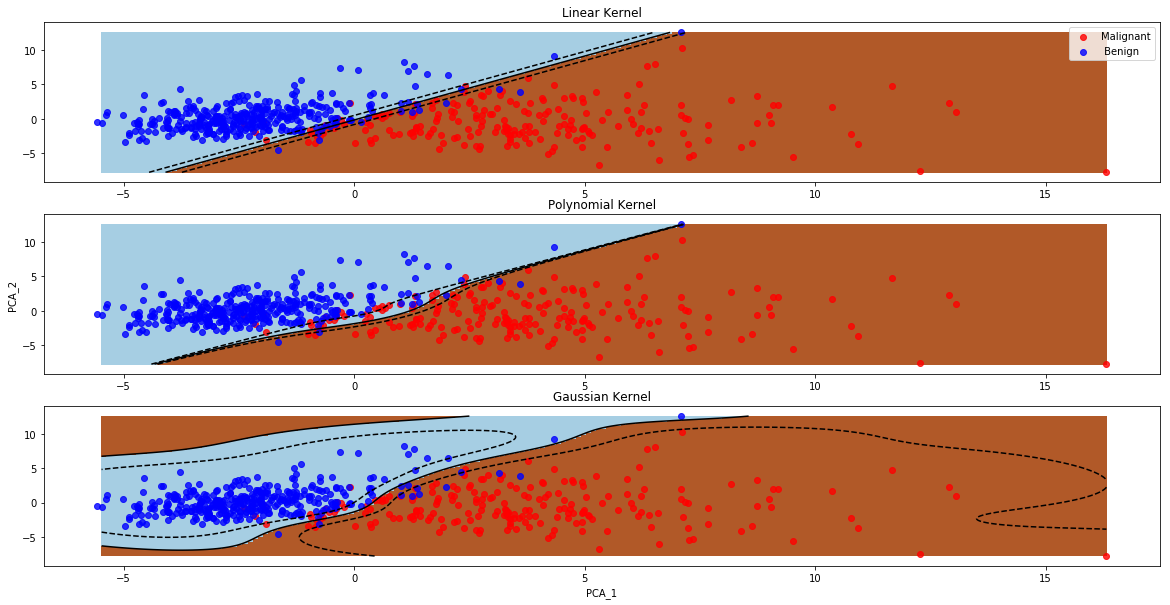

In [10]:
plt.figure(figsize = (20,10))
plt.subplot(3,1,1)
x_min = X.PCA_1.min()
x_max = X.PCA_1.max()
y_min = X.PCA_2.min()
y_max = X.PCA_2.max()

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf2.decision_function(np.c_[XX.ravel(), YY.ravel()])
Z = clf2.decision_function(np.c_[XX.ravel(), YY.ravel()])

Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])

plt.scatter(PCA_df.PCA_1[PCA_df.target == 1],PCA_df.PCA_2[PCA_df.target == 1], alpha = 0.8, color = 'r')
plt.scatter(PCA_df.PCA_1[PCA_df.target == 0],PCA_df.PCA_2[PCA_df.target == 0], alpha = 0.8, color = 'b')

plt.title('Linear Kernel')
plt.legend(['Malignant', ' Benign'])


plt.subplot(3,1,2)
x_min = X.PCA_1.min()
x_max = X.PCA_1.max()
y_min = X.PCA_2.min()
y_max = X.PCA_2.max()

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf3.decision_function(np.c_[XX.ravel(), YY.ravel()])
Z = clf3.decision_function(np.c_[XX.ravel(), YY.ravel()])

Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])

plt.scatter(PCA_df.PCA_1[PCA_df.target == 1],PCA_df.PCA_2[PCA_df.target == 1], alpha = 0.8, color = 'r')
plt.scatter(PCA_df.PCA_1[PCA_df.target == 0],PCA_df.PCA_2[PCA_df.target == 0], alpha = 0.8, color = 'b')

plt.ylabel('PCA_2')
plt.title('Polynomial Kernel')

plt.subplot(3,1,3)

x_min = X.PCA_1.min()
x_max = X.PCA_1.max()
y_min = X.PCA_2.min()
y_max = X.PCA_2.max()

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf4.decision_function(np.c_[XX.ravel(), YY.ravel()])
Z = clf4.decision_function(np.c_[XX.ravel(), YY.ravel()])

Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])

plt.scatter(PCA_df.PCA_1[PCA_df.target == 1],PCA_df.PCA_2[PCA_df.target == 1], alpha = 0.8, color = 'r')
plt.scatter(PCA_df.PCA_1[PCA_df.target == 0],PCA_df.PCA_2[PCA_df.target == 0], alpha = 0.8, color = 'b')

plt.xlabel('PCA_1')
plt.title('Gaussian Kernel')